### K NEIGHBORS
* modelo de clasficacion supervisado; yo proporciono los datos, las grupos y a quien pertenece cada datos
* uno podria empezar haciendo un clustering para encontrar los grupos(con un kmeans o cluster jerarquico) y despues usamos k-NEIGHBORS
* con la informacion previa suministrada el modelo , a partir de nueva informacion, ya puede clasificar (ejemplo pensemos datos sobre tumores)
* busca los datos "vecinos", que esten mas cercas, y el grupo mas representativo de esos puntos vencinos es el que se asigna al nuevo datos
* se pueden especificar el numero de datos vecinos a tener en cuenta (k numeros) y sus pesos (por ejemplo mas peso quien este mas cerca)
* https://www.aprendemachinelearning.com/clasificar-con-k-nearest-neighbor-ejemplo-en-python/

### Nearest Neighbors Method in Real Applications

* k-NN can serve as a good starting point (baseline) in some cases;
* In Kaggle competitions, k-NN is often used for the construction of meta-features (i.e. k-NN predictions as input to other models) or for stacking/blending;
* The nearest neighbors method extends to other tasks like recommendation systems. The initial decision could be a recommendation of a product (or service) that is popular among the closest neighbors of the person for whom we want to make a recommendation;
* In practice, on large datasets, approximate methods of search are often used for nearest neighbors. There is a number of open source libraries that implement such algorithms; check out Spotify's library Annoy.

The quality of classification/regression with k-NN depends on several parameters:

* The number of neighbors  k .
* The distance measure between samples (common ones include Hamming, Euclidean, cosine, and Minkowski distances). Note that most of these metrics require data to be scaled. Simply speaking, we do not want the "salary" feature, which is on the order of thousands, to affect the distance more than "age", which is generally less than 100.
* Weights of neighbors (each neighbor may contribute different weights; for example, the further the sample, the lower the weight).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("seaborn-bright")
import seaborn as sns

In [2]:
from sklearn import preprocessing,neighbors
from sklearn.model_selection import cross_validate  

In [35]:
url = r"https://raw.githubusercontent.com/joanby/python-ml-course/master/datasets/cancer/breast-cancer-wisconsin.data.txt"
df = pd.read_csv(url, header=None)
df.head(4)


,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2


In [36]:
# hay valores que son interrogantes lo convertimos a -99999 que seria como 0 (para que no cuente como tal )
df.replace("?",-99999,inplace=True)

In [37]:
df.describe()

,0,1,2,3,4,5,7,8,9,10
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [38]:
df.corr().style.background_gradient(cmap='mako')

,0,1,2,3,4,5,7,8,9,10
0,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.060051,-0.052072,-0.034901,-0.080226
1,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.558428,0.535835,0.350034,0.716001
2,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.755721,0.722865,0.458693,0.817904
3,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.735948,0.719446,0.438911,0.818934
4,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666715,0.603352,0.417633,0.696800
5,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.616102,0.628881,0.479101,0.682785
7,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,1.000000,0.665878,0.344169,0.756616
8,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.665878,1.000000,0.428336,0.712244
9,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.344169,0.428336,1.000000,0.423170
10,-0.080226,0.716001,0.817904,0.818934,0.696800,0.682785,0.756616,0.712244,0.423170,1.000000


In [39]:
# renombramos las columnas,quitamos la Y y tambien la primera fila
["V"+str(v) for v in range(1,10)]

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9']

In [40]:
df.columns = ["name",'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',"target"]

In [41]:
df.head(2)

,name,V1,V2,V3,V4,V5,V6,V7,V8,V9,target
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2


In [42]:
X = df.drop(["name","target"],axis=1).copy()
Y = df["target"]

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=0,test_size=0.2)

In [48]:
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train,Y_train)

KNeighborsClassifier()

In [49]:
# ya vemos que el score es super alto 
clf.score(X_test,Y_test)

0.9857142857142858

### Prediciendo los resultados
* aqui hacemos una prediccion individual
* ojo con reshape y predict 
* https://stackoverflow.com/questions/41472015/knearest-neighbors-in-sklearn-valueerror-query-data-dimension-must-match-trai

In [59]:
clf.predict(X_test.iloc[1].values.reshape(1, -1))

array([2], dtype=int64)

### Creando nuestro propio modelo
* recordar que se basa en la distancia (euclidea,manhattan..)
* aprendemos tambien a usar warnings (ej si un usario elige un parametro fuera de rango)

In [60]:
import warnings
from math import sqrt
from collections import Counter

In [61]:
# creamos un data set y un nuevo punto
dataset = {
    "k":[[1,2],[2,3],[3,1]],
    "r":[[6,5],[7,7],[8,6]]
}
new_point = [5,7]

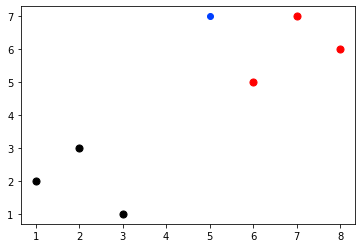

In [64]:
[[plt.scatter(ii[0],ii[1], s=50,color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_point[0],new_point[1])

In [ ]:
# ver los notebooks como desarolla el algoritmo :)

### Decision trees and nearest neighbors method in a customer churn prediction task (mlcourse.ai)

In [2]:
url = r"C:\Users\gonza\OneDrive\Documentos\datascience-thebridge-master\ejercicios gonzalo\DATA\telecom_churn.csv"
df = pd.read_csv(url)
df.head(2)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False


In [5]:
# mira como tranforma columnas categoricas (factorize yes/no,astype false/true)
df["International plan"] = pd.factorize(df["International plan"])[0]
df["Voice mail plan"] = pd.factorize(df["Voice mail plan"])[0]
df["Churn"] = df["Churn"].astype("int")
states = df["State"]
y = df["Churn"]
df.drop(["Churn","State"],axis=1,inplace=True)

In [6]:
df.head(3)

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,0,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0


Let's allocate 70% of the set for training (X_train, y_train) and 30% for the hold-out set (X_holdout, y_holdout). The hold-out set will not be involved in tuning the parameters of the models. We'll use it at the end, after tuning, to assess the quality of the resulting model. Let's train 2 models: decision tree and k-NN. We do not know what parameters are good, so we will assume some random ones: a tree depth of 5 and the number of nearest neighbors equal 10.

In [9]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

X_train, X_holdout, y_train, y_holdout = train_test_split(df.values,y,test_size=0.3,
                                        random_state=17)

tree = DecisionTreeClassifier(max_depth=5,random_state=17)
knn = KNeighborsClassifier(n_neighbors=10 )

tree.fit(X_train, y_train)

#for knn we need to scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.fit_transform(X_holdout)
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=10)

Let's assess prediction quality on our hold-out set with a simple metric, the proportion of correct answers (accuracy). The decision tree did better: the percentage of correct answers is about 94% (decision tree) versus 88% (k-NN). Note that this performance is achieved by using random parameters.

In [10]:
from sklearn.metrics import accuracy_score

tree_pred = tree.predict(X_holdout)
accuracy_score(y_holdout,tree_pred)

0.94

In [12]:
knn_predict = knn.predict(X_holdout_scaled)
accuracy_score(y_holdout,knn_predict)

0.886

Now, let's identify the parameters for the tree using cross-validation. We'll tune the maximum depth and the maximum number of features used at each split. Here is the essence of how the GridSearchCV works: for each unique pair of values of max_depth and max_features, compute model performance with 5-fold cross-validation, and then select the best combination of parameters.

In [13]:
from sklearn.model_selection import GridSearchCV,cross_val_score

tree_params = {"max_depth":range(1,11),
                "max_features":range(4,19)}
tree_grid = GridSearchCV(tree,tree_params,cv=5,n_jobs=-1,verbose=True)
tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:    5.4s finished


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'max_features': range(4, 19)},
             verbose=True)

In [14]:
#Let's list the best parameters and the corresponding mean accuracy from cross-validation.
tree_grid.best_params_

{'max_depth': 6, 'max_features': 17}

In [15]:
tree_grid.best_score_

0.94257014456259

In [16]:
accuracy_score(y_holdout,tree_grid.predict(X_holdout))

0.946

In [20]:
#Now, let's tune the number of neighbors  k  for k-NN:
from sklearn.pipeline import Pipeline

knn_pipeline = Pipeline([("scaler",StandardScaler()),("knn",KNeighborsClassifier(n_jobs=-1))])
knn_params = {"knn__n_neighbors": range(1, 10)}

knn_grid = GridSearchCV(knn_pipeline,knn_params,cv=5,n_jobs=-1,verbose=True)

knn_grid.fit(X_train,y_train)
print("-----------------------------------------")
print("los mejores parametros y el mejor score son:")
print(knn_grid.best_params_,knn_grid.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  45 | elapsed:    0.5s remaining:    0.2s
-----------------------------------------
los mejores parametros y el mejor score son:
{'knn__n_neighbors': 7} 0.8859867109023905
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.8s finished


In [21]:
accuracy_score(y_holdout,knn_grid.predict(X_holdout))

0.89

Here, the tree proved to be better than the nearest neighbors algorithm: 94.2%/94.6% accuracy for cross-validation and hold-out respectively. Decision trees perform very well, and even random forest (let's think of it for now as a bunch of trees that work better together) in this example cannot achieve much better performance (95.1%/95.3%) despite being trained for much longer.

In [22]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=17)
print(np.mean(cross_val_score(forest,X_train,y_train,cv=5)))

0.9494233119813256


In [23]:
forest_params = {"max_depth":range(6,12),"max_features":range(4,19)}
forest_grid = GridSearchCV(forest,forest_params,cv=5,n_jobs=-1,verbose=True)

forest_grid.fit(X_train,y_train)
print("-------------------------")
print(forest_grid.best_params_,forest_grid.best_score_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   29.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  1.4min finished
-------------------------
{'max_depth': 9, 'max_features': 6} 0.9511372931045574


In [24]:
accuracy_score(y_holdout,forest_grid.predict(X_holdout))

0.953